## Supervised Learning - Building a model for identifying potential customers for Thera Bank

Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Read the column description and ensure you understand each attribute well

Study the data distribution in each attribute, share your findings. (5 points)

Get the target column distribution. Your comments

Split the data into training and test set in the ratio of 70:30 respectively

Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

Print the confusion matrix for all the above models (5 points)

Give your reasoning on which is the best model in this case and why it performs better? (5 points)


In [171]:
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [121]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv',delimiter=',')
#student_df1=student_df.copy(deep=False)
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [122]:
bank_ordered_df=bank_df.pop('Personal Loan')
bank_df['Personal Loan']=bank_ordered_df
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [123]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [124]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [125]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


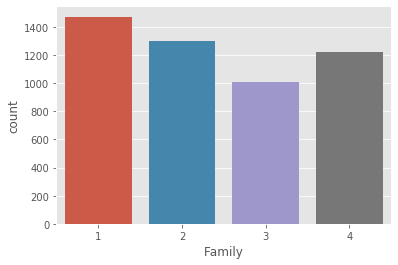

In [126]:
sns.countplot(bank_df['Family'])

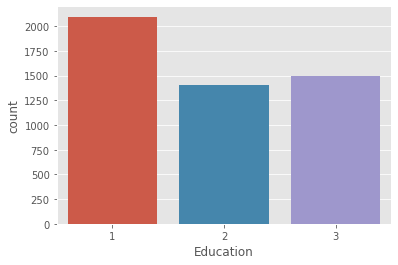

In [127]:
#bank_df.columns.values
sns.countplot(x='Education',data=bank_df)

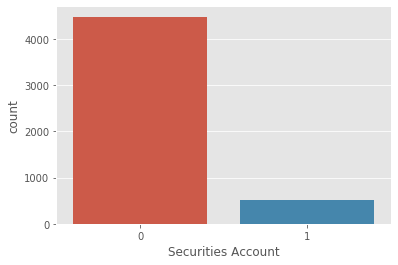

In [128]:
sns.countplot(x='Securities Account',data=bank_df)

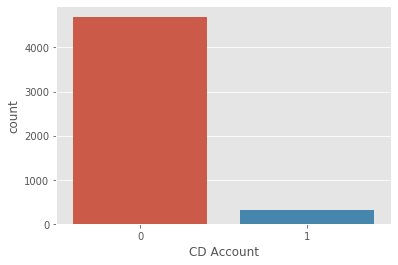

In [129]:
sns.countplot(x='CD Account',data=bank_df)

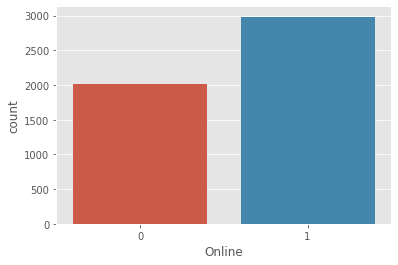

In [130]:
sns.countplot(x='Online',data=bank_df)

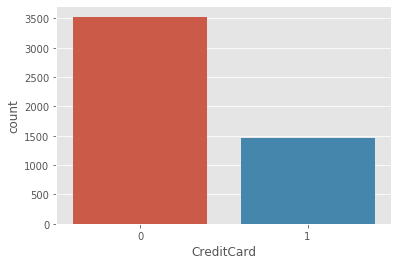

In [131]:
sns.countplot(x='CreditCard',data=bank_df)

In [132]:
bank_df.columns.values

array(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Personal Loan'], dtype=object)

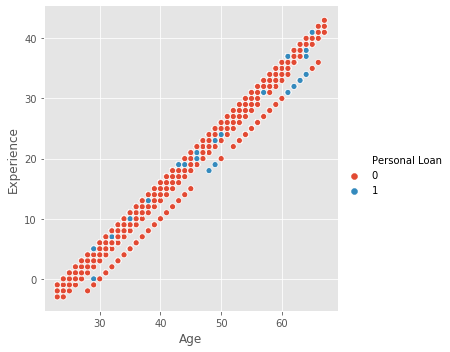

In [133]:
# Relationship between features
sns.relplot(x="Age",y="Experience",hue="Personal Loan",data=bank_df)

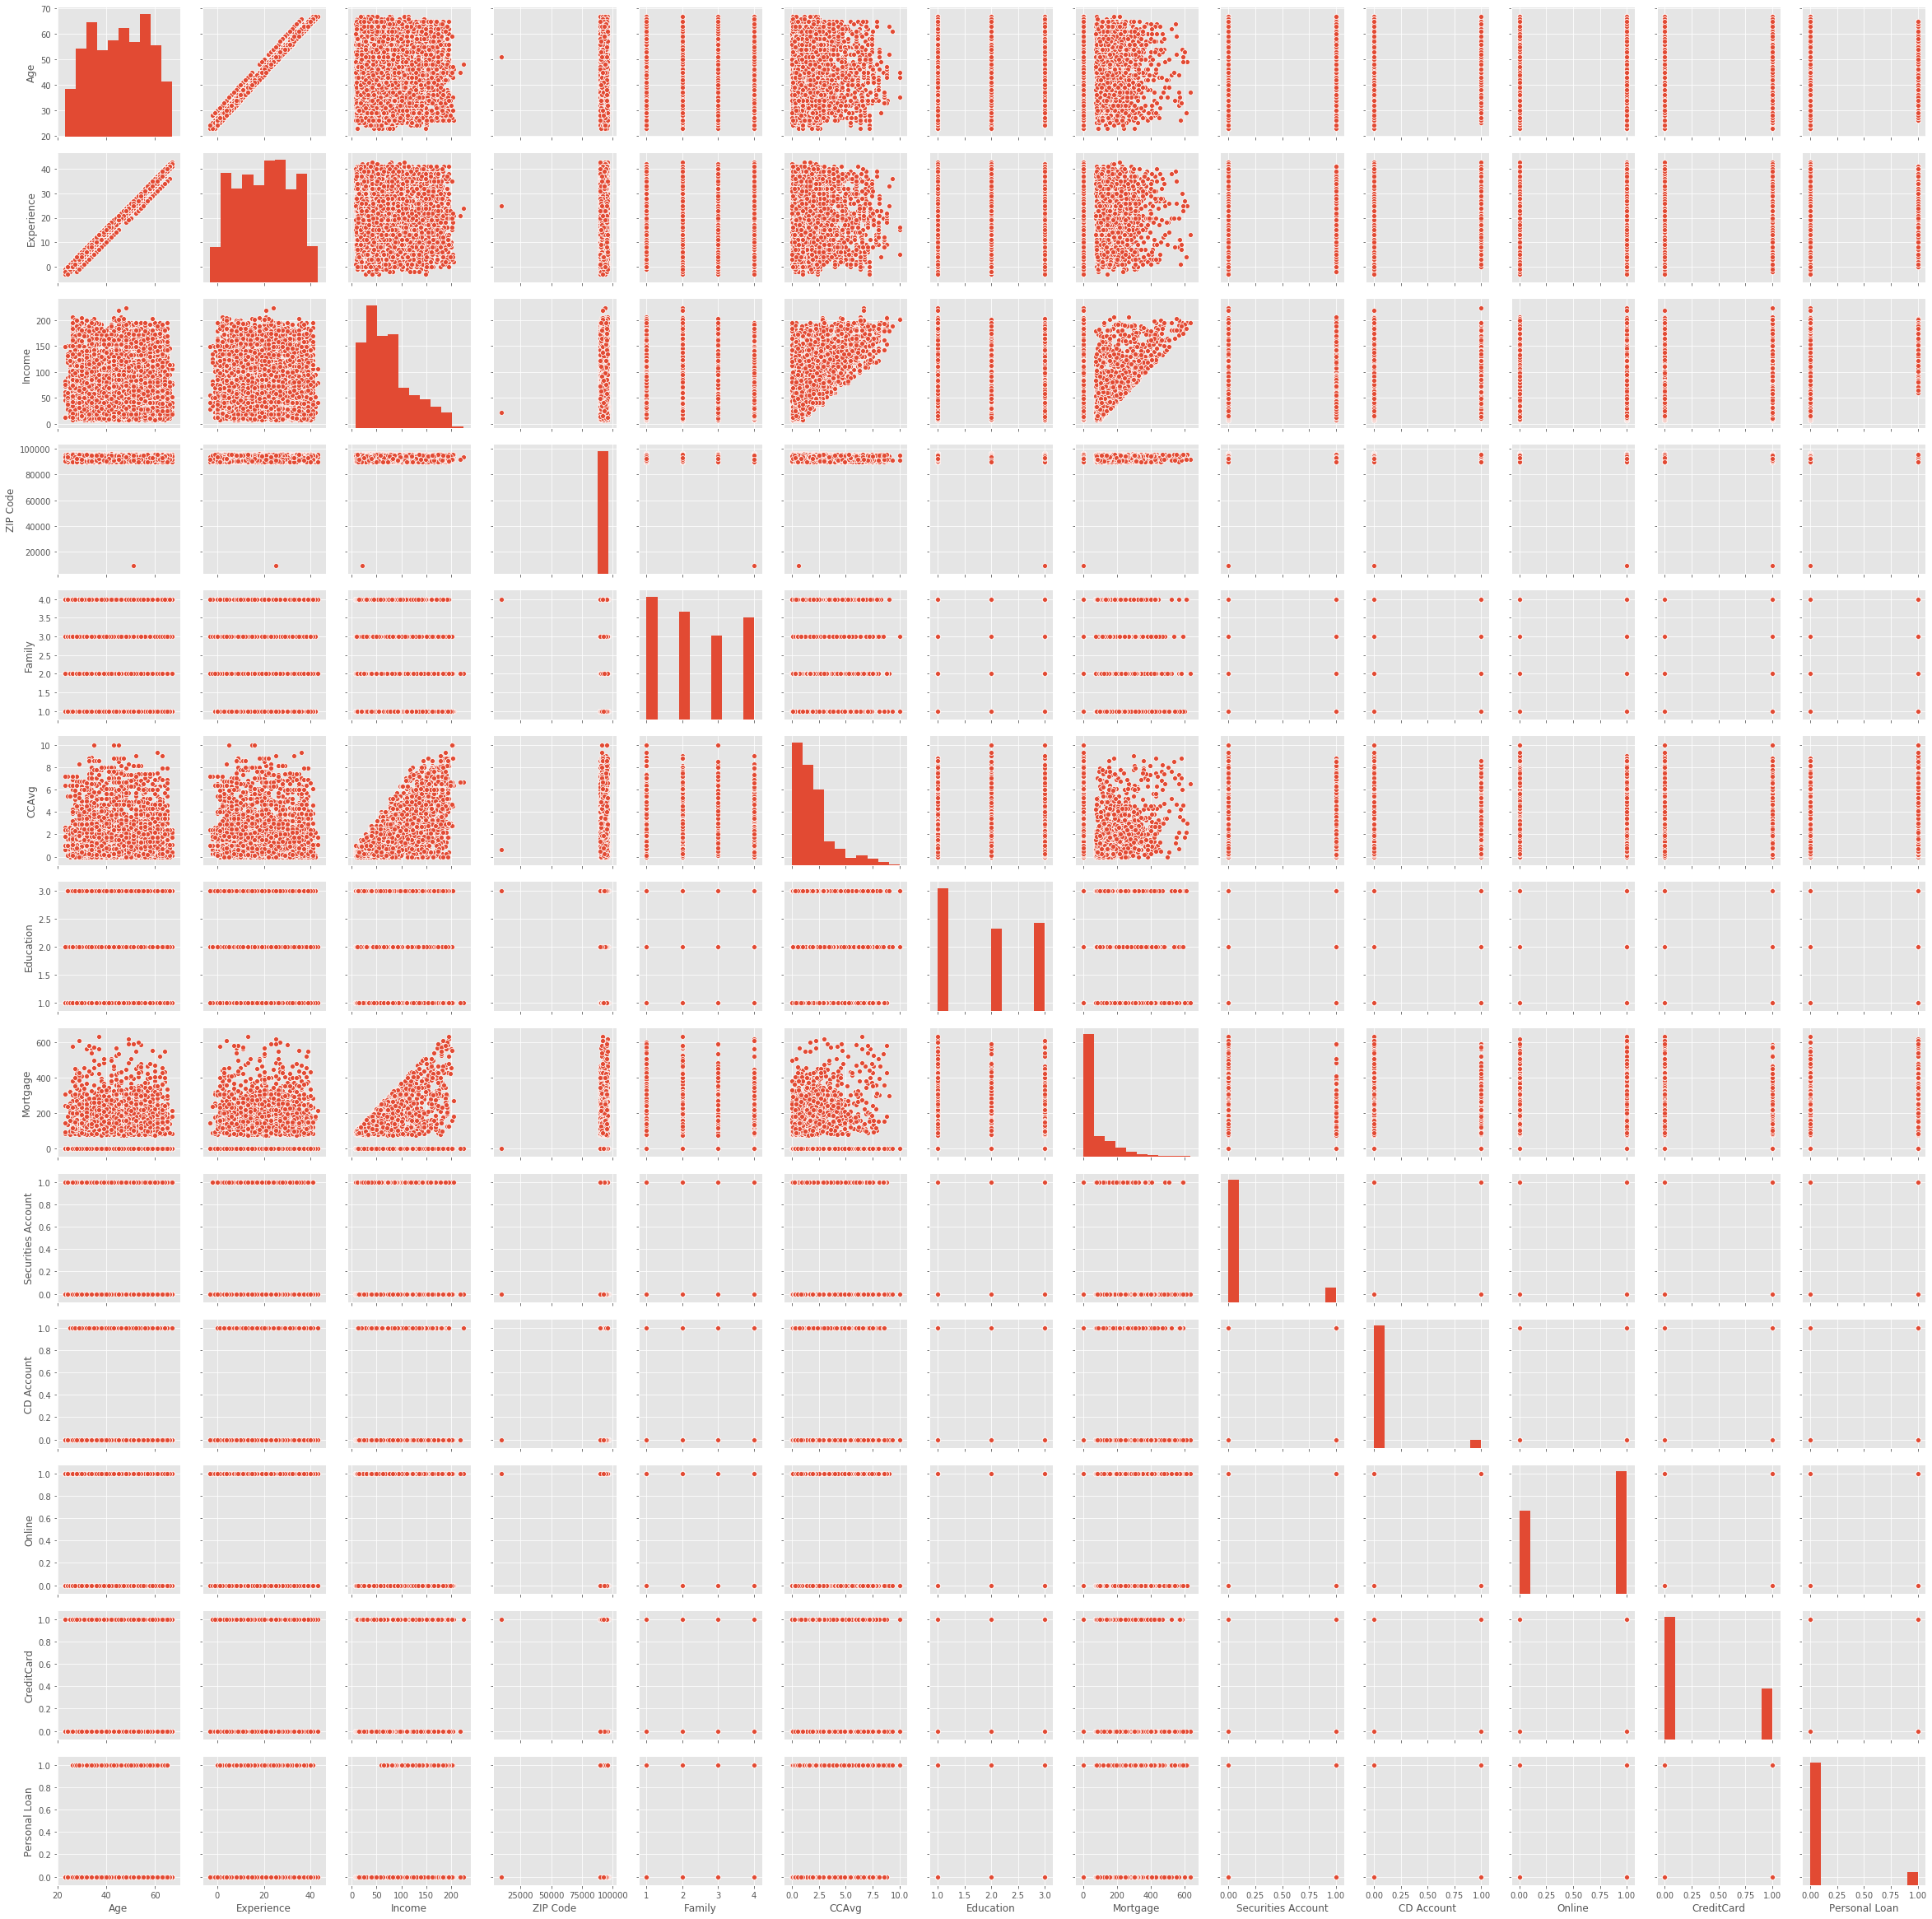

In [135]:
sns.pairplot(bank_df[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account', 'CD Account',
       'Online', 'CreditCard','Personal Loan']])

There is no correlation between Independent and Target variables as most of the independent variables are binary or list of values

Income has some minor correlation with Mortgage and CCAvg among independent variables

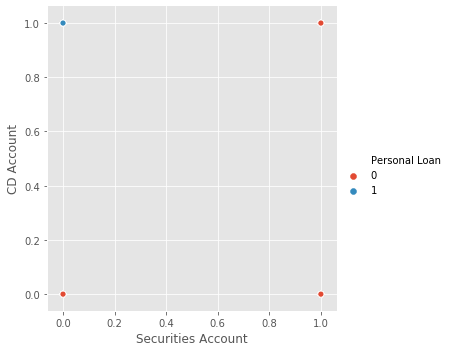

In [136]:
sns.relplot(x="Securities Account",y="CD Account",hue="Personal Loan",data=bank_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026788B15FC8>]],
      dtype=object)

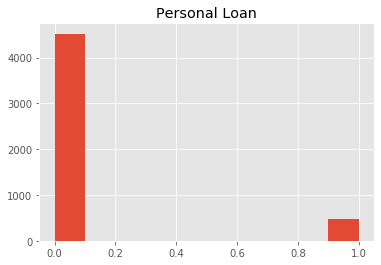

In [137]:
# Target Column Distribution and visualization
bank_df.hist(column='Personal Loan')

#### Target variable Personal Loan has majority of data with 0 deriving the fact the customers are not intersted in Loan.
#### Also most of the customers don't have CD Account or Securities Account with bank even though they have online banking.
#### Based on relation with CD and Securities Account attributes loan is availed only by customers who have CD account which is very less.
#### Customers who don't have Securities Account or who don't have CD and Securities Account doesn't have loan deriving the fact that these Target variable has high dependency on these 2 independent variables
#### Age is positively correlated with Experience

In [138]:
# Split the data into training and test
bank_df.shape

(5000, 14)

In [139]:
# Remove ID column as it is unique field and will not help in prediction
X = bank_df.iloc[:,1:13]
X[0:10]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,0,0,0,0


In [140]:
y = bank_df.iloc[:,13]
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal Loan, dtype: int64

Scaling the data as most of the attributes have binary or nominal list of values
Some attributes like Age,Experince and Zip have range of values

In [141]:
X_scaled = (X - np.min(X))/(np.max(X) - np.min(X))

Splitting the data into train and test which will be used for various algorithms

In [164]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state=1)

## KNN Classification

In [165]:
knn = KNeighborsClassifier(n_neighbors = 3)  #n_neighbors = k
knn.fit(x_train,y_train)  # the model is creating
knn.predict(x_test)  # prediction 

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [166]:
print("score:{}".format(knn.score(x_test,y_test)))

score:0.9553333333333334


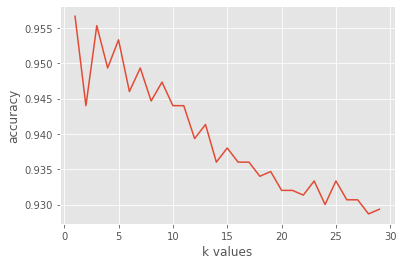

In [167]:
score_list = []
for val in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = val)
    knn2.fit(x_train,y_train)
    knn_predict=knn2.predict(x_test)
    score_list.append(knn2.score(x_test,y_test))
    
# visualize
plt.plot(range(1,30),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [168]:
#Finding best value of k for the best score
max(score_list)
max_index = score_list.index(max(score_list))
print ("Optimal k value is {} with score of {}".format(max_index+1,max(score_list)))

Optimal k value is 1 with score of 0.9566666666666667


k value of 3 is optimal one with score of 0.9553 as 1 neighbour will be kind of overfitting the data
Score value decreases as k increases

In [169]:
knn_predict.shape

(1500,)

In [172]:
# Confusion Matrix for knn

confusion_matrix = confusion_matrix(y_test, knn_predict)
print(confusion_matrix)

[[1347    4]
 [ 102   47]]


## Logistic Regression

In [173]:
model=LogisticRegression()
model.fit(x_train,y_train)  # the model is creating
model.predict(x_test)  # prediction 

C:\Users\SivaPC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [174]:
prediction=model.predict(x_test)

In [175]:
#Accuracy score
accuracy_score(y_test, prediction)

0.9446666666666667

In [176]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[1339   12]
 [  71   78]]


In [177]:
# F1 Score
f1_score(y_test,prediction)

0.6527196652719667

In [178]:
f1_score(y_test,prediction,average=None)
# f1_score by classes of 0 and 1

array([0.96993843, 0.65271967])

## Naive Bayes

In [179]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB = GNB.fit(x_train,y_train)

In [180]:
y_pred_GNB=GNB.predict(x_test)

In [181]:
accuracy_score(y_test, y_pred_GNB)

0.8766666666666667

In [184]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[1231  120]
 [  65   84]]


In [185]:
f1_score(y_test,y_pred_GNB)

0.4759206798866855

In [186]:
f1_score(y_test,y_pred_GNB,average=None)
# f1_score by classes of 0 and 1

array([0.93010956, 0.47592068])

## Findings

Based on the Model Accuracy Score KNN appears to be better than Logistic and Naive Bayes

For the customer loan purchase program we need to have low False Positive or High Recall value so that even a slight chance of customer availing loan can be captured.

From the confusion matrix Naive Bayes has high recall value than KNN and Logistic Regression and hence it will be better model for the given problem.